In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Declare variables and load files

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Overview of Module Project

# Import your data into a Pandas DataFrame.
# Merge your DataFrames.
# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# Determine the mean, median, and mode for the following:
# The total number of rides for each city type.
# The average fares for each city type.
# The total number of drivers for each city type.
# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# The number of rides for each city type.
# The fares for each city type.
# The number of drivers for each city type.
# Create a pie chart that visualizes each of the following data for each city type:
# The percent of total fares.
# The percent of total rides.
# The percent of total drivers.
# Omar has approved the project scope. It's time to get to work!

In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# 5.2.4 Explore the Data in Pandas
# Inspect the City Data DataFrame
# For the city_data_df DataFrame, we need to:

# 1. Get all the rows that contain null values.
# 2. Make sure the driver_count column has an integer data type.
# 3. Find out how many data points there are for each type of city.
# 4. First, let's get all the rows that are not null.

In [7]:
# 1. Get all the rows that contain null values.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# Another approach to verify null values. Use the df.isnull().sum()
# Get the columns that are not null.

city_data_df.isnull().sum()

# shows that there are zero null values in all three columns.

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Get the data types of each column.

city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# check how many data points there are for each type of city. 
# To do this, we'll use the sum() method on the city_data_df, use the unique() fx first 

# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# use the sum() method on the city_data_df for the type column where the condition equals 
# either Urban, Suburban, or Rural.

# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [12]:
sum(city_data_df["type"]=="Rural")

18

In [13]:
sum(city_data_df["type"]=="Suburban")

36

In [14]:
# Inspect Ride Data DataFrame
# For the ride_data_df DataFrame, we need to:

# 1. Get all the rows that contain null values.
# 2. Make sure the fare and ride_id columns are numerical data types.

In [15]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [16]:
# Get the columns and the rows that are null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [17]:
# determine if the fare and ride_id columns are numerical data types so that we 
# can perform mathematical calculations on those columns.

# Get the data types of each column.
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## 5.2.4 Merge DataFrames

In [19]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
# 5.3.1 Create DataFrames for Each Type of City

# create a bubble chart that showcases the average fare versus the total 
# number of rides with bubble size based on the average number of drivers for 
# each city type: urban, suburban, and rural.
    
# Needs:
# The average fare for each type of city on the y-axis
# The total number of rides for each type city on the x-axis
# Make the size of each marker, or bubble, correlate to the average number of 
# drivers for each type of city

# Here are the steps to create a bubble chart:

# 1. To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
# 2. To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
# 3. To make the bubble size correlate to the number of drivers for each city, we can get the average 
# driver_count for each city.

In [24]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [29]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [30]:
# 5.3.2 Get the Number of Rides for Each City Type

# We'll use the groupby() function to create a Series of data that has the name 
# of the city as the index, apply the count() method to 
# the Series for each city, and select the ride_id column.

# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [31]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [32]:
# 5.3.3 Get the Average Fare for Each City Type

# Using the separate DataFrames for each city type, we can calculate the 
# average fare for each city in the urban, suburban, and rural cities.
# Using the groupby() function, we can chain the mean() method to get the averages of 
# the fare column.

# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [35]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [36]:
# 5.3.4 Get the Average Number of Drivers for Each City Type

# To get the average number of drivers for each city in the urban, suburban, 
# and rural cities, we can use the groupby() function and get the mean() of the 
# driver_count column.

# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [37]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

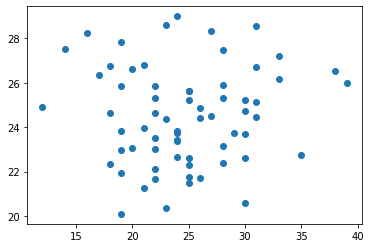

In [38]:
# 5.3.5 Create Bubble Charts

# Create first scatter plot for urban cities using the MATLAB method.
# To create a scatter plot using the MATLAB method, use the plt.scatter() function.

# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, urban_avg_fare)

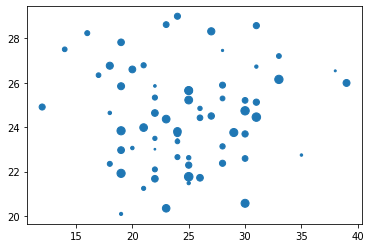

In [39]:
# Build the scatter plots for urban cities. -> change the size
plt.scatter(urban_ride_count,
           urban_avg_fare,
            s=urban_driver_count)


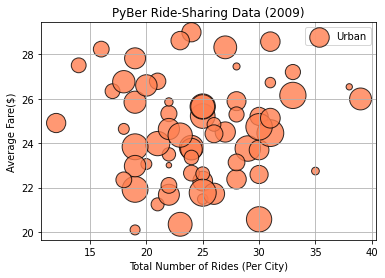

In [41]:
# increase the size by a factor of 10, add black edge color with a width of 1, 
# add title, label for the axes, a legend, and a grid

plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, c="coral",
            edgecolor="black", linewidths=1,
            alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2009)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

#Add the legend
plt.legend()

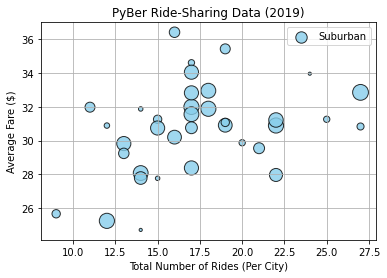

In [42]:
# Create the Suburban Cities Bubble Chart

# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# Add the legend.
plt.legend()

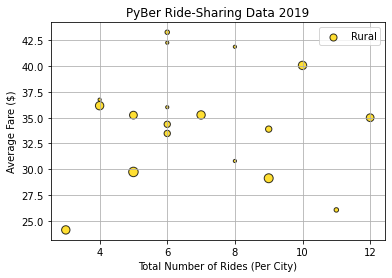

In [43]:
# Create the Rural Cities Bubble Chart

# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidths=1,
           alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data 2019")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

#Add the legend
plt.legend()


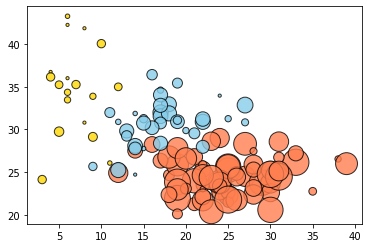

In [44]:
# 5.3.6 Create a Bubble Chart for All Cities

# Add the three plt.scatter() functions for each chart to one cell and run the cell.

# Add the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Show the plot
plt.show()

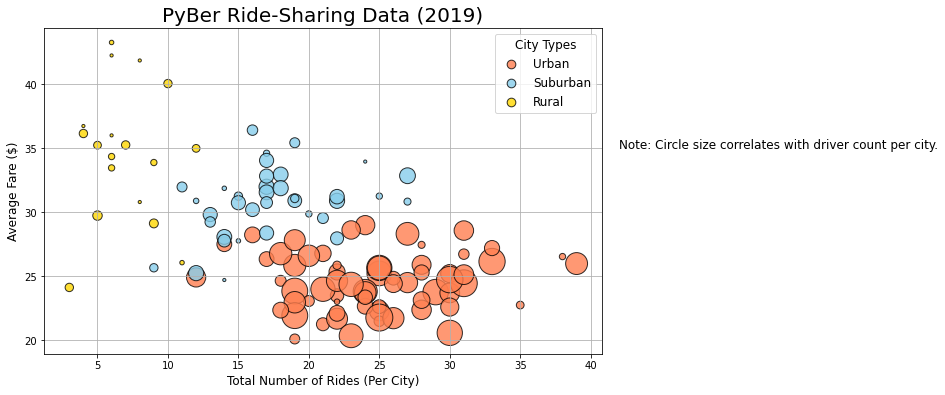

<Figure size 432x288 with 0 Axes>

In [53]:
# Build the scatter charts for each city type.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

# Save the figure.
plt.savefig("analysis/Fig1.png")


In [46]:
# Fix the legend

# Declare a variable for the legend function, lgnd = plt.legend(), 
# and add parameters for font size, legend location, and legend title, 
# along with some other features. After we declare the variable for the legend, 
# we can use legendHandles[]._sizes to set the font size of the marker in the legend to a fixed size. Inside the brackets, we can add the list element for 
# the number of markers in the legend.

In [ ]:
# 5.4.1 Summary Statistics for Number of Rides by City Type

# The Pandas describe() function on the DataFrame or Series.
# The Pandas mean(), median(), and mode() methods on a Series.
# The NumPy mean() and median() functions, and the SciPy stats mode() function on a Series.

In [54]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [55]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [56]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [57]:
# Get summary statistics.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [58]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [59]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [61]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)


(24.62, 17.36, 6.94)

In [64]:
urban_ride_count.median()

24.0

In [65]:
# Calculate the mode of the ride count for the urban cities.
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [66]:
# Calculate the mode of the ride count for the suburban cities.
suburban_ride_count.mode()

0    17
dtype: int64

In [67]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [68]:
# Let's calculate the mean, median, and mode—otherwise known as the measures of central 
# tendency for the ride counts—and print out those measures.

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [69]:
# 5.4.2 Summary Statistics for the Fare by City Type

# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [70]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")


The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [71]:
# 5.4.3 Summary Statistics for the Number of Drivers by City Type

# perform summary statistics for the number of drivers by city type, 
# we need to create a Series for each city type based on the 
# driver_count column in each city type DataFrame.

In [72]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

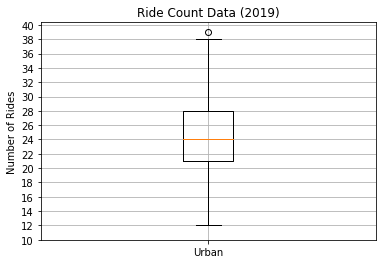

In [73]:
# 5.4.4 Create Box-and-Whisker Plots
# box-and-whisker plot requires that we use the ax.boxplot()

# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

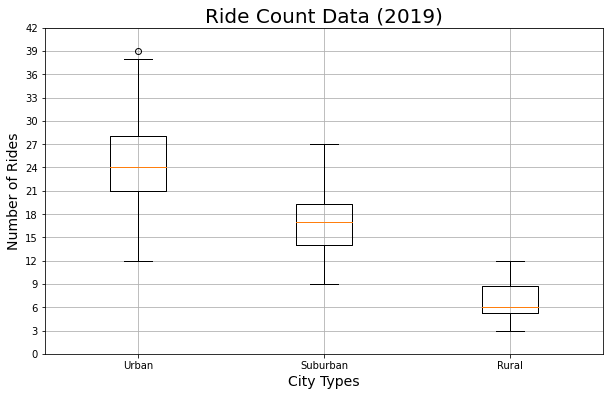

In [74]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [75]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")


West Angela has the highest rider count.


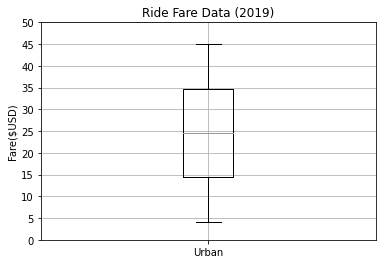

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [76]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

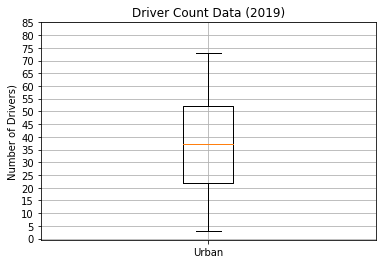

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [77]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

In [78]:
# 5.5.1 Get the Percentage of Fares for Each City Type

# To create this pie chart, we will need to do the following:

# Get the total fares for each city type.
# Get the total for all the fares for all the city types.
# Calculate the percentage of the total fares for each city type.

In [79]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [80]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [81]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

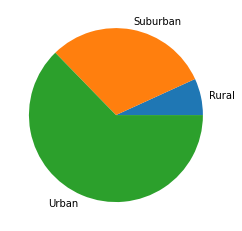

In [82]:
# 5.5.2 Pie Chart for the Percentage of Fares by City Type

# Build the percentage of fares by city type pie chart.
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

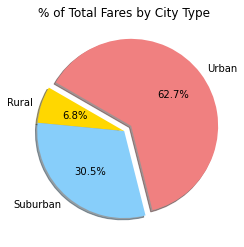

In [83]:
# Build the percentage of fares by city type pie chart.
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

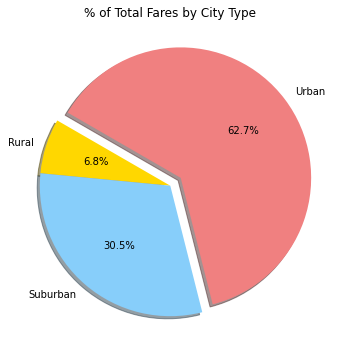

In [84]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [86]:
# 5.6.1 Calculate Ride Percentages

# 1. Use the groupby() function on the pyber_data_df DataFrame and group by 
# the type of city column:
# 2. Apply the count() function on the ride_id column to get the Series with the total 
# number of rides for each city type:
# 3. Get the number of total rides using the count() function on the 
# 4. ride_id column on the pyber_data_df DataFrame: pyber_data_df["ride_id"].count()
# Divide the total number of rides for each city type by the total rides for all the cities 
# and divide by 100.

# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

In [87]:
# 5.6.2 Pie Chart for Percentage of Rides by City Type

# 1. Replace type_percents with ride_percents, which will represent the values for each pie wedge.
# 2. We'll use the same arrays for labels and colors as before.
# 3. We will use the same parameters, explode, autopct, shadow=True, and startangle=150 as before.
# 4. We will change the font size with mpl.rcParams['font.size'] = 14 as before. There is no need to import matplotlib as mpl, since this was already done for the previous pie chart.
# 5. Change the title to "% of Total Rides by City Type."
# Save the figure as Fig6.png.

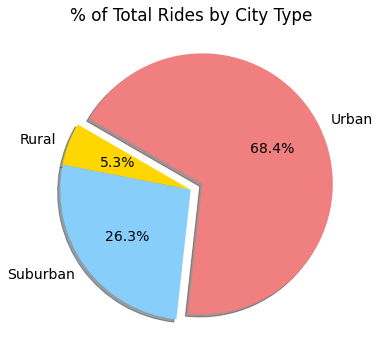

In [88]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()

In [89]:
# 5.7.1 Calculate Driver Percentages

# final pie chart will be the percentage of the total drivers for each city type, 
# where each pie wedge will be the percentage of total drivers.

In [95]:
# Calculate the percentage of drivers for each city type.
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

In [96]:
# 5.7.2 Pie Chart for the Percentage of Drivers for Each City Type
# Replace ride_percents with driver_percents, which will represent the values for each pie wedge.
# We'll use the same arrays for labels and colors as before.
# We will use the same parameters, explode, autopct, and shadow=True, but change the startangle to 165.
# We'll use the same code to change the font size as before.
# Change the title to "% of Total Rides by City Type."
# Save the figure as Fig7.png.

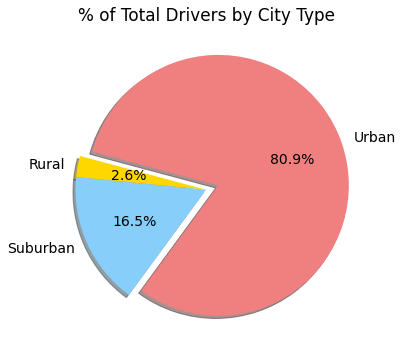

In [97]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()